 # Цель: По показателям экономического развития субъектов Российской Федерации провести регрессионный анализ

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import norm
from scipy import stats

##### В качестве результативного признака Y выступает ожидаемая продолжительность жизни граждан, выраженная в годах, а в качестве объясняющих признаков Х1...Х9 выступают : 

In [2]:
variables = pd.DataFrame( pd.read_excel("C:/Users/admin/OneDrive/Рабочий стол/Data.xlsx",  sheet_name='Sheet2'))
variables

,Переменная,Наименование переменной
0,У,"Ожидаемая продолжительность жизни граждан, лет"
1,X1,"Коэффициент смертности, %"
2,X2,"Среднедушевые доходы населения (в месяц, руб)"
3,X3,"Процент безработных, %"
4,X4,Продажа алкогольной продукции населению на 100...
5,X5,"Численность студентов, обучающихся по программ..."
6,X6,Численность населения на одну больничную койку
7,X7,"Реальный размер назначенных пенсий, в % к пред..."
8,X8,Индексы потребительских цен на продовольственн...
9,X9,Кол-во преступлений (наркотики) на 100 000 чел...


In [3]:
data = pd.DataFrame(pd.read_excel("C:/Users/admin/OneDrive/Рабочий стол/Data.xlsx", engine="openpyxl", sheet_name='Sheet1'))
data.head()

,Наименование,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,Алтайский край,64.50,1.436297,36431,48.9,57.566303,245,104.42,102.5,110.2,102.254999
1,Амурская область,62.30,1.409012,54055,49.7,103.012932,204,107.54,101.7,108.6,122.916944
2,Архангельская область без автономного округа,65.52,1.423624,55952,55.8,132.151078,186,108.79,102.0,108.5,57.438795
3,Астраханская область,66.80,1.180473,36593,47.6,56.868132,298,119.02,101.5,108.7,58.431953
4,Белгородская область,68.16,1.343573,47257,43.5,52.228960,321,140.00,101.6,108.8,103.485040


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Наименование  85 non-null     object 
 1   Y             85 non-null     float64
 2   X1            85 non-null     float64
 3   X2            85 non-null     int64  
 4   X3            85 non-null     float64
 5   X4            85 non-null     float64
 6   X5            85 non-null     int64  
 7   X6            85 non-null     float64
 8   X7            85 non-null     float64
 9   X8            85 non-null     float64
 10  X9            85 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 7.4+ KB


#### Оценим основные характеристики переменных

In [5]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,66.787765,1.245908,49467.717647,49.556471,78.501091,240.764706,124.860235,102.396471,108.360000,79.183457
std,3.480810,0.285516,23930.147655,6.740310,32.871554,114.551574,23.623865,1.635866,1.472947,33.797228
min,58.670000,0.323407,24414.000000,20.600000,0.637517,0.000000,74.230000,96.200000,101.700000,17.386825
25%,64.630000,1.091767,38277.000000,45.800000,59.349270,178.000000,108.830000,101.500000,107.700000,56.459065
50%,66.070000,1.318189,42684.000000,49.200000,74.150559,230.000000,122.320000,102.400000,108.500000,71.712168
75%,68.470000,1.436297,50601.000000,53.600000,101.050053,298.000000,133.730000,103.100000,109.000000,97.936707
max,77.810000,1.701945,156988.000000,62.100000,161.920214,707.000000,225.600000,106.400000,112.100000,171.555556


#### По исходным статистическим данным оценим коэффициенты  уравнения регрессии


In [6]:
#Построение модели 
Y = data['Y']
X = data[data.columns[2:11]]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           2.08e-19
Time:                        11:21:19   Log-Likelihood:                -166.63
No. Observations:                  85   AIC:                             353.3
Df Residuals:                      75   BIC:                             377.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0007     23.834      4.154      0.0

In [7]:
coefficients = pd.DataFrame(model.params)

equation = f"Y = {coefficients.loc['const',0]:.4f}"

for name, coef in coefficients[1:].iterrows():
    x = name
    i = coef[0]
    sign = "+" if i >= 0 else "-"
    equation += f" {sign} {abs(i):.6f}*{x}"


print("Оценка уравнения регрессии выглядит следующим образом:")
print(equation)

Оценка уравнения регрессии выглядит следующим образом:
Y = 99.0007 - 5.398514*X1 - 0.000019*X2 - 0.067042*X3 - 0.009359*X4 + 0.006966*X5 + 0.050641*X6 - 0.143817*X7 - 0.111537*X8 - 0.020902*X9


##### Из полученных результатов (R2 = 0,75) можно сделать следующий вывод: Доля вариации ожидаемой продолжительности жизни граждан, обусловленная вышеописанными значимыми признаками, составляет 75%, т.е. результативный признак зависит от неучтенных факторов на 25%.


#### Проверка гипотезы о нормальном характере распределения регрессионных остатков

In [8]:
ks_test = stats.kstest(model.resid, 'norm', args=(np.mean(model.resid), np.std(model.resid, ddof=1)))
alpha = 0.05
ks_test.pvalue

print("Регрессионные остатки принадлежат нормальному распределнию" if ks_test.pvalue > alpha else "Регрессионные остатки не принадлежат нормальному распределнию")

Регрессионные остатки принадлежат нормальному распределнию


#### Гистограмма распределения регрессионных остатков: 

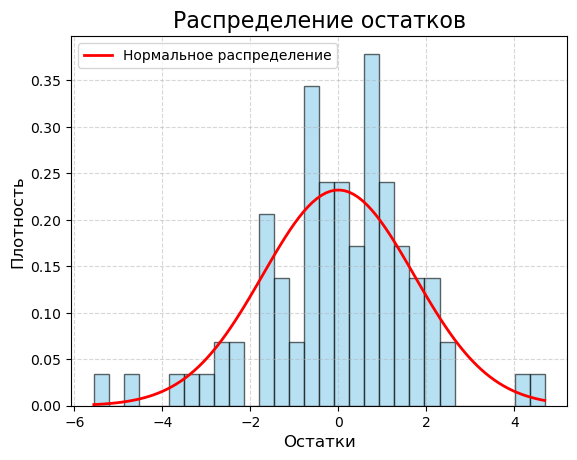

In [34]:
plt.hist(model.resid, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black') 
plt.title("Распределение остатков", fontsize=16)
plt.xlabel("Остатки", fontsize=12) 
plt.ylabel("Плотность", fontsize=12)

# Параметры нормального распределения
mu, std = np.mean(model.resid), np.std(model.resid)
x = np.linspace(min(model.resid), max(model.resid), 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'r', linewidth=2, label=f'Нормальное распределение')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()






#### Проверка значимости уравнения регрессии и значимости коэффициентов

In [10]:
f_pvalue = model.f_pvalue
alpha = 0.05

print("Уравнение значимо" if f_pvalue < alpha else "Уравнение незначимо")

Уравнение значимо


In [11]:
alpha = 0.05
df = len(data) - len(variables[1:]) - 1
t_kr = stats.t.ppf(1 - alpha/2, df)

t_stat = model.tvalues
p_value = model.pvalues

results_st = pd.DataFrame({
    'Коэффициент': t_stat.index,
    't-статистика': t_stat.values,
    'p-value': p_value.values,
    'Значимость': ['значим' if abs(t_stat[i]) > t_kr and p_value[i] < alpha else 'незначим'
                   for i in range(len(t_stat))]
})

print(results_st)

  Коэффициент  t-статистика   p-value Значимость
0       const      4.153749  0.000086     значим
1          X1     -4.892880  0.000006     значим
2          X2     -1.379843  0.171735   незначим
3          X3     -1.911691  0.059736   незначим
4          X4     -0.873218  0.385332   незначим
5          X5      3.578649  0.000610     значим
6          X6      4.336442  0.000044     значим
7          X7     -1.109468  0.270773   незначим
8          X8     -0.689740  0.492486   незначим
9          X9     -3.334075  0.001332     значим


C:\Users\admin\AppData\Local\Temp\ipykernel_19944\1350848431.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Значимость': ['значим' if abs(t_stat[i]) > t_kr and p_value[i] < alpha else 'незначим'


#### Построение доверительных интервалов для значимых коэффициентов КЛМНР

In [12]:
signif = results_st[results_st['Значимость'] == 'значим']
x_signif = signif['Коэффициент'].values  

conf_int = model.conf_int().loc[x_signif]

for var, (lower, upper) in zip(conf_int.index, conf_int.values):    
    lower_rounded = round(lower, 4)
    upper_rounded = round(upper, 4)
    
    if var == 'const':
        print(f"{lower_rounded} < b0 < {upper_rounded}")
    else:
        coef_num = var[1:] 
        print(f"{lower_rounded} < b{coef_num} < {upper_rounded}")

51.5208 < b0 < 146.4805
-7.5965 < b1 < -3.2005
0.0031 < b5 < 0.0108
0.0274 < b6 < 0.0739
-0.0334 < b9 < -0.0084


#### Проанализируем оценку матрицы парных коэффициентов корреляции между объясняющими признаками (для обнаружения мультиколлениарности)

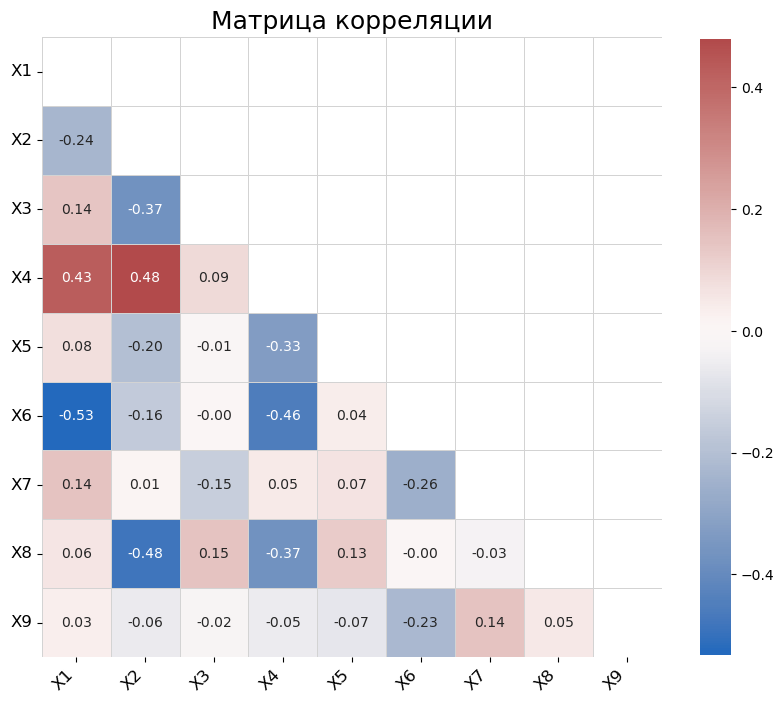

In [13]:
plt.figure(figsize=(10, 10))
corr_matrix = data[data.columns[2:]].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix,
                     annot=True,     
                     fmt=".2f",     
                     cmap='vlag',    
                     center=0,        
                     linewidths=0.5, 
                     linecolor='lightgray', 
                     square=True,    
                     cbar_kws={"shrink": .8}, 
                     annot_kws={"fontsize": 10},
                     mask=mask) 


plt.title('Матрица корреляции', fontsize=18) 
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(rotation=0, fontsize=12)
plt.show()


#### Коэффициенты корреляции, превышающие 0.5 по абсолютной величине, указывают на возможную мультиколлинеарность в данных

In [14]:
cor = 0.5
multicol = (corr_matrix.abs() > cor) & (corr_matrix < 1)

print("Мультиколлениарность:")
print(corr_matrix[multicol].stack())

Мультиколлениарность:
X1  X6   -0.532733
X6  X1   -0.532733
dtype: float64


#### Рассчитаем значения коэффициентов детерминации каждой из объясняющих переменных по всем остальным переменным

In [15]:
r_2 = {}
X = data[data.columns[2:11]]
for col in X.columns:
    target_x = X[col]  
    other_x = X.drop(columns=[col])  
    other_x = sm.add_constant(other_x)  
    model_r2 = sm.OLS(target_x, other_x).fit()  
    r_2[col] = model_r2.rsquared 

for var, r2 in r_2.items():
    print(f"R² для {var} на основе остальных переменных: {r2:.4f}")

R² для X1 на основе остальных переменных: 0.5985
R² для X2 на основе остальных переменных: 0.6502
R² для X3 на основе остальных переменных: 0.2869
R² для X4 на основе остальных переменных: 0.6790
R² для X5 на основе остальных переменных: 0.1987
R² для X6 на основе остальных переменных: 0.4765
R² для X7 на основе остальных переменных: 0.1139
R² для X8 на основе остальных переменных: 0.2977
R² для X9 на основе остальных переменных: 0.1124


In [16]:
multicol_r2 = {var: r2 for var, r2 in r_2.items() if r2 > 0.55}

vars_str = ", ".join(multicol_r2.keys()) 
print(f"Анализ коэффициентов детерминации показал наличие сильной линейной связи между переменными {vars_str} и всеми остальными признаками")

Анализ коэффициентов детерминации показал наличие сильной линейной связи между переменными X1, X2, X4 и всеми остальными признаками


#### Коэффициент инфляции дисперсии

In [17]:
name = []
vif = []
VIF = pd.DataFrame()
for var, r2 in r_2.items():
    VIFi = round(1/(1-r2),2)
    name.append(var)
    vif.append(VIFi)
VIF['X'] = pd.DataFrame(name)
VIF['VIF'] = pd.DataFrame(vif)
VIF

,X,VIF
0,X1,2.49
1,X2,2.86
2,X3,1.40
3,X4,3.11
4,X5,1.25
5,X6,1.91
6,X7,1.13
7,X8,1.42
8,X9,1.13


#### Устранение мультиколлинеарности методом пошаговой регрессии с включением и исключением переменных:

In [18]:
# включение переменных 
def step_forward(file): 
    all_vars = list(file.columns[2:])
    selected_vars = []
    table = pd.DataFrame(columns=['модель', 'adjR2', 'n'])

    while all_vars:
        best_var = None
        adjr2 = 0
        for var in all_vars:
            X = sm.add_constant(file[selected_vars + [var]])
            Y = file['Y']
            model = sm.OLS(Y,X).fit()
            if adjr2 < model.rsquared_adj:
                adjr2 = model.rsquared_adj
                best_var = var 
        
        selected_vars.append(best_var)
        all_vars.remove(best_var)
        equation_string = " + ".join(selected_vars)
        row_data = [f'Y = {equation_string}', adjr2, len(selected_vars)]
        new_row = pd.DataFrame([row_data], columns=['модель', 'adjR2', 'n'])
        table = pd.concat([table, new_row], ignore_index=True)

    return table

print(step_forward(data))

C:\Users\admin\AppData\Local\Temp\ipykernel_19944\359863354.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table = pd.concat([table, new_row], ignore_index=True)


                                           модель     adjR2  n
0                                          Y = X6  0.504585  1
1                                     Y = X6 + X1  0.603922  2
2                                Y = X6 + X1 + X5  0.681622  3
3                           Y = X6 + X1 + X5 + X9  0.708336  4
4                      Y = X6 + X1 + X5 + X9 + X4  0.720682  5
5                 Y = X6 + X1 + X5 + X9 + X4 + X3  0.723773  6
6            Y = X6 + X1 + X5 + X9 + X4 + X3 + X2  0.725166  7
7       Y = X6 + X1 + X5 + X9 + X4 + X3 + X2 + X7  0.725657  8
8  Y = X6 + X1 + X5 + X9 + X4 + X3 + X2 + X7 + X8  0.723751  9


In [19]:
# исключение переменных
def step_backward(file): 
    all_vars = list(file.columns[2:])
    table = pd.DataFrame(columns=['модель', 'adjR2', 'n'])

    while len(all_vars) != 1:
        worst_var = None
        adjr2 = -1
        for var in all_vars:
            selected_vars = all_vars.copy()
            selected_vars.remove(var)
            X = sm.add_constant(file[selected_vars])
            Y = file['Y']
            model = sm.OLS(Y,X).fit()
            if adjr2 < model.rsquared_adj:
                adjr2 = model.rsquared_adj
                worst_var = var
        
        all_vars.remove(worst_var)

        equation_string = " + ".join(all_vars)
        row_data = [f'Y = {equation_string}', adjr2, len(all_vars)]
        new_row = pd.DataFrame([row_data], columns=['модель', 'adjR2', 'n'])
        table = pd.concat([table, new_row], ignore_index=True)

    return table

print(step_backward(data))
            

C:\Users\admin\AppData\Local\Temp\ipykernel_19944\1315235400.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table = pd.concat([table, new_row], ignore_index=True)


                                      модель     adjR2  n
0  Y = X1 + X2 + X3 + X4 + X5 + X6 + X7 + X9  0.725657  8
1       Y = X1 + X2 + X3 + X5 + X6 + X7 + X9  0.727217  7
2            Y = X1 + X2 + X3 + X5 + X6 + X9  0.726639  6
3                 Y = X1 + X2 + X5 + X6 + X9  0.713215  5
4                      Y = X1 + X5 + X6 + X9  0.708336  4
5                           Y = X1 + X5 + X6  0.681622  3
6                                Y = X1 + X6  0.603922  2
7                                     Y = X6  0.504585  1


Проведенный анализ выявил, что переменная **X4 (продажи алкогольной продукции)** демонстрирует:
- Наибольшую степень зависимости от других факторов модели (**R² = 0.679**)
- Повышенный показатель мультиколлинеарности (**VIF = 3.11**)
- Умеренные корреляционные связи с ключевыми предикторами **X1 (0.43), X2 (0.48) и X6 (0.46)**

Эти факторы, в совокупности с анализом остальных статистических показателей, послужили основанием для исключения **X4** из финальной модели.

Дополнительно, переменные **X2(доход) и X7(размер пенсий)** были исключены из-за их нелогичного отрицательного знака в модели, что противоречит экономической интерпретации. Ожидалось, что эти факторы должны положительно влиять на продолжительность жизни, однако оценки коэффициентов указывали на обратное.

Что касается взаимосвязи между **X1 (коэффициент смертности)** и **X6 (нагрузка на больничные койки)**:
- Умеренная корреляция (**0.53**) находится в допустимых пределах
- Показатели **VIF** для этих переменных соответствуют норме
- Оба фактора демонстрируют содержательную значимость для модели

На основании комплексного анализа:
- Сравнения показателей **adjR²** во всех тестируемых моделях
- Оценки статистической значимости предикторов
- Анализа мультиколлинеарности
- Содержательной интерпретируемости переменных

**Оптимальной** была признана модель:
**Y = X1 + X3 + X5 + X6 + X9**

Данная спецификация:
1. Демонстрирует **максимальную объясняющую способность**
2. Сохраняет **стабильность оценок** за счет контроля мультиколлинеарности
3. Включает **все значимые факторы**


#### Построение новой модели 

In [20]:
new_data = data.drop(['X2', 'X4','X7', 'X8'], axis=1)
new_data.head()

,Наименование,Y,X1,X3,X5,X6,X9
0,Алтайский край,64.50,1.436297,48.9,245,104.42,102.254999
1,Амурская область,62.30,1.409012,49.7,204,107.54,122.916944
2,Архангельская область без автономного округа,65.52,1.423624,55.8,186,108.79,57.438795
3,Астраханская область,66.80,1.180473,47.6,298,119.02,58.431953
4,Белгородская область,68.16,1.343573,43.5,321,140.00,103.485040


In [21]:
X = new_data[new_data.columns[2:]]
Y = new_data['Y']
X = sm.add_constant(X)

new_model = sm.OLS(Y,X).fit()
new_summary = new_model.summary()
print(new_summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     42.60
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           4.63e-21
Time:                        11:21:21   Log-Likelihood:                -170.56
No. Observations:                  85   AIC:                             353.1
Df Residuals:                      79   BIC:                             367.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.7609      2.575     25.927      0.0

In [22]:
new_coefficients = pd.DataFrame(new_model.params)

new_equation = f"Y = {new_coefficients.loc['const',0]:.4f}"

for name, coef in new_coefficients[1:].iterrows():
    x = name
    i = coef[0]
    sign = "+" if i >= 0 else "-"
    new_equation += f" {sign} {abs(i):.6f}*{x}"


print("Новое уравнение регрессии:")
print(new_equation)

Новое уравнение регрессии:
Y = 66.7609 - 5.133645*X1 - 0.044550*X3 + 0.008276*X5 + 0.064747*X6 - 0.018266*X9


#### Исследуем регрессионные остатки на наличие/отсутствие гетероскедастичности
##### Для этого построим графики зависимости модулей остатков от упорядоченных по возрастанию значений той объясняющей переменной, вариацией которой возможно порождается гетероскедастичность

In [23]:
residuals = np.array(new_model.resid)
new_data['residuals'] = abs(residuals)
new_data.head()

,Наименование,Y,X1,X3,X5,X6,X9,residuals
0,Алтайский край,64.50,1.436297,48.9,245,104.42,102.254999,0.370203
1,Амурская область,62.30,1.409012,49.7,204,107.54,122.916944,1.419499
2,Архангельская область без автономного округа,65.52,1.423624,55.8,186,108.79,57.438795,1.019283
3,Астраханская область,66.80,1.180473,47.6,298,119.02,58.431953,0.885450
4,Белгородская область,68.16,1.343573,43.5,321,140.00,103.485040,0.403379


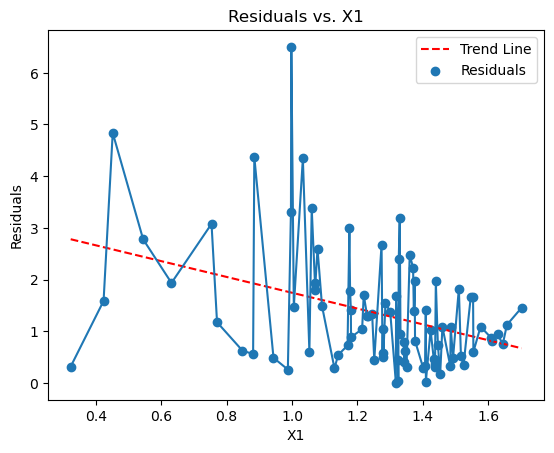

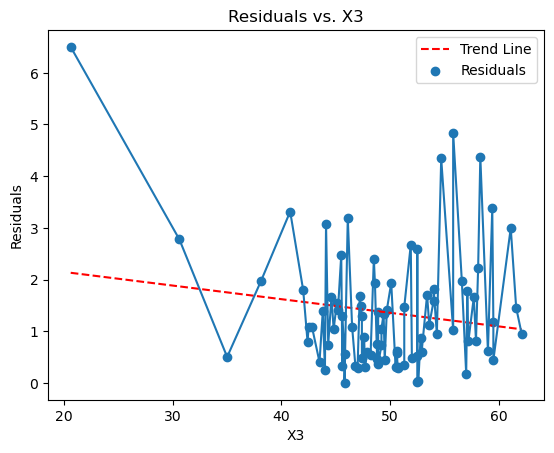

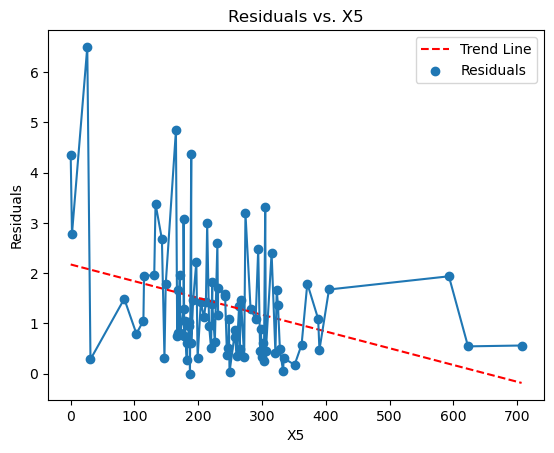

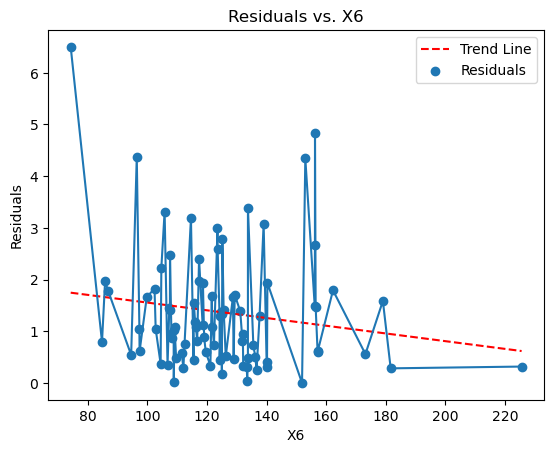

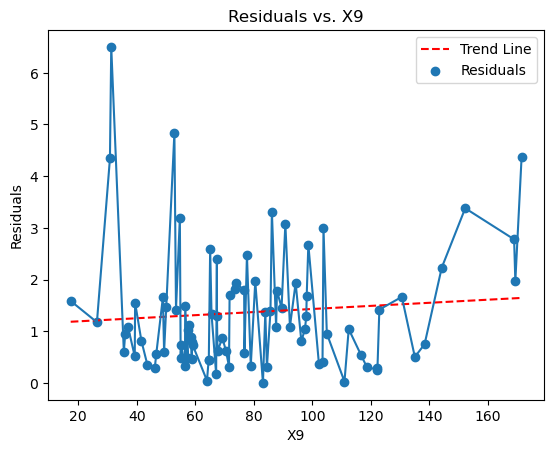

In [24]:
def graph(file, Xj, column_name):
   df = pd.DataFrame()
   df['Xj'] = Xj 
   df['e'] = file['residuals']
   df = df.sort_values(by='Xj')
   

   z = np.polyfit(df['Xj'], df['e'], 1) 
   p = np.poly1d(z)
   plt.plot(df['Xj'], p(df['Xj']), "r--", label="Trend Line")
   plt.scatter(df['Xj'], df['e'], label="Residuals")
   plt.xlabel(column_name)
   plt.ylabel("Residuals")
   plt.title(f"Residuals vs. {column_name}")
   plt.legend() 

   return(plt.plot(df['Xj'], df['e']))
   
for i in new_data.columns[2:7]:
   plt.show(graph(new_data, new_data[i], i))


##### На некоторых рисунках видно, что модули регрессионных остатков имеют тенденцию к снижению при увеличении значений объясняющей переменной. Следовательно, можно заподозрить гетероскедастичность по переменной X1, X3, X5

#### Проведем тест ранговой корреляции Спирмена

In [25]:
# Тест Спирмена 
spearman = pd.DataFrame(columns=['rho', 'pvalue', 'hypothesis'])
alpha = 0.05

for x in new_data.columns[2:7]:
    rho, pvalue = spearmanr(new_data[x], new_data['residuals'])
    if pvalue < alpha:
        hypothesis = 'есть гетерос.'
    else:
        hypothesis = 'нет гетерос.'

    new_row = {'rho': rho, 'pvalue': pvalue, 'hypothesis': hypothesis}
    spearman = pd.concat([spearman, pd.DataFrame([new_row], index=[f'{x} & |e|'])], ignore_index=False)
 
spearman


C:\Users\admin\AppData\Local\Temp\ipykernel_19944\3035182511.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  spearman = pd.concat([spearman, pd.DataFrame([new_row], index=[f'{x} & |e|'])], ignore_index=False)


,rho,pvalue,hypothesis
X1 & |e|,-0.299257,0.005399,есть гетерос.
X3 & |e|,0.031114,0.777421,нет гетерос.
X5 & |e|,-0.296670,0.005833,есть гетерос.
X6 & |e|,-0.143404,0.190424,нет гетерос.
X9 & |e|,0.075454,0.492502,нет гетерос.


#### Проведем тест Голдфелда-Квандта

In [26]:
# Тест Голдфелда-Квандта 
def test_kvandta(file, Xj, Y):
    kvandta = pd.DataFrame()
    kvandta['Y'] = file[Y]
    kvandta['Xj'] = file[Xj]
    kvandta = kvandta.sort_values(by = 'Xj')
    n = round(3/8 * len(file))

    n1 = kvandta[:n]
    n2 = kvandta[-n:]

    X1 = sm.add_constant(n1['Xj'])
    X2 = sm.add_constant(n2['Xj'])

    model1 = sm.OLS(n1['Y'],X1).fit()
    model2 = sm.OLS(n2['Y'],X2).fit()

    rss1 = np.sum(model1.resid**2)
    rss2 = np.sum(model2.resid**2)
    fvalue = max(rss1,rss2) / min(rss1,rss2)
    
    alpha = 0.05
    df1 = model1.df_resid
    df2 = model2.df_resid
    F_critical = stats.f.ppf(1 - alpha, df2, df1)
    
    if fvalue > F_critical:
        h = 'H1: наличие гетероскедастичности' 
    else:
        h = 'H0: отсутствие гетероскедастичности'

    return (h)


results = []
for x in new_data.columns[2:7]:
    t = test_kvandta(new_data, x, 'Y')
    results.append({'X': x, 'hypothesis': t})

kvandta = pd.DataFrame(results)
print(kvandta)


    X                           hypothesis
0  X1     H1: наличие гетероскедастичности
1  X3  H0: отсутствие гетероскедастичности
2  X5     H1: наличие гетероскедастичности
3  X6  H0: отсутствие гетероскедастичности
4  X9  H0: отсутствие гетероскедастичности


#### Проведем тест Глейзера

In [27]:
# Тест Глейзера для Х1
def gleizera(file, Xj):
    gleiz  = pd.DataFrame(columns=['ϒ', 'b0', 'Sb0', 'b1', 'Sb1', 'R2', 'F'])
    gamma = np.arange(-3, 3.5, 0.5)
    gamma = gamma[gamma != 0]

    result = []
    for i in gamma:
        x = file[Xj] ** i 
        y = file['residuals']
        x = sm.add_constant(x)
        model_glz = sm.OLS(y, x).fit()
        
        result.append ({
        'ϒ': i,
        'b0': model_glz.params['const'], 
        'Sb0': model_glz.bse['const'],    
        'b1': model_glz.params[Xj],  
        'Sb1': model_glz.bse[Xj],  
        'R2': model_glz.rsquared,   
        'F': model_glz.fvalue,     
        'pval': model_glz.f_pvalue
    })
        gleiz = pd.DataFrame(result)
        gleiz = gleiz.round(4)
    return gleiz

gleiz = gleizera(new_data, 'X1')
print(gleiz)


      ϒ      b0     Sb0      b1     Sb1      R2        F    pval
0  -3.0  1.3350  0.1356  0.0264  0.0353  0.0067   0.5579  0.4572
1  -2.5  1.3004  0.1420  0.0653  0.0598  0.0141   1.1899  0.2785
2  -2.0  1.2290  0.1576  0.1511  0.1015  0.0260   2.2154  0.1404
3  -1.5  1.0729  0.1982  0.3373  0.1749  0.0429   3.7175  0.0573
4  -1.0  0.6945  0.3089  0.7655  0.3211  0.0641   5.6842  0.0194
5  -0.5 -0.5624  0.6961  2.0903  0.7417  0.0873   7.9431  0.0060
6   0.5  4.6018  0.9397 -2.9203  0.8419  0.1266  12.0320  0.0008
7   1.0  3.2751  0.5362 -1.5301  0.4196  0.1381  13.2973  0.0005
8   1.5  2.7975  0.4007 -1.0065  0.2696  0.1437  13.9325  0.0003
9   2.0  2.5299  0.3319 -0.7111  0.1898  0.1446  14.0313  0.0003
10  2.5  2.3480  0.2897 -0.5173  0.1396  0.1420  13.7365  0.0004
11  3.0  2.2116  0.2609 -0.3816  0.1051  0.1371  13.1833  0.0005


In [28]:
alpha = 0.05 
for pval in gleiz['pval']: 
    if pval < alpha:
        print('H1: наличие гетероскедастичности')
        break

H1: наличие гетероскедастичности


#### Найдем ОМНК-оценки коэффициентов уравнения регрессии для построения ОЛММР

In [29]:
# Оценки bomnk и Sbj

def bomnk(file, Xj): 
    X = file.iloc[:, 2:7] 
    Y = file.iloc[:, 1]  
    n = len(Y)

    X1 = np.diag(1 / file[Xj]**2)
    XJ = sm.add_constant(X)
    XJ_np = XJ.to_numpy()
    Y_np = Y.to_numpy().reshape(-1, 1)
    
    # bomnk
    part1 = np.linalg.inv(XJ_np.T @ np.linalg.inv(X1) @ XJ_np)
    part2 = XJ_np.T @ np.linalg.inv(X1) @ Y_np
    b = np.dot(part1, part2)
    b_df = pd.DataFrame(b, index=['const', 'x1','x3','x5','x6','x9'], columns=['b'])

    # Sbj
    fgh = Y_np - XJ_np @ b 
    Somnk = np.sqrt((fgh.T @ np.linalg.inv(X1) @ fgh) / (n - XJ_np.shape[1] - 1))
    XT_invX_X = np.linalg.inv(XJ_np.T @ np.linalg.inv(X1) @ XJ_np)
    Sbj = pd.DataFrame(np.sqrt(np.diag(Somnk[0,0]**2 * XT_invX_X)), columns=['Sbj'], index=['const', 'x1','x3','x5','x6','x9'])

    res = b_df.join(Sbj)
    return res

b_table = bomnk(new_data, 'X1')
b_table



,b,Sbj
const,65.845425,2.510067
x1,-3.767129,0.919640
x3,-0.044337,0.028234
x5,0.008381,0.001749
x6,0.057912,0.010338
x9,-0.019641,0.005466


#### Построение обобщенной линейной модели множественной регрессии

In [30]:

new_equationOMNK = f"Y = {b_table.iloc[0,0]:.4f}"

for i in range(1,6):
    x = b_table.index[i]
    coeff = b_table.iloc[i,0]
    sign = "+" if coeff >= 0 else "-"
    new_equationOMNK += f" {sign} {abs(coeff):.6f}*{x}"


print("Уравнение регрессии:")
print(new_equationOMNK)


Уравнение регрессии:
Y = 65.8454 - 3.767129*x1 - 0.044337*x3 + 0.008381*x5 + 0.057912*x6 - 0.019641*x9


#### Проверим модель на автокорреляцию

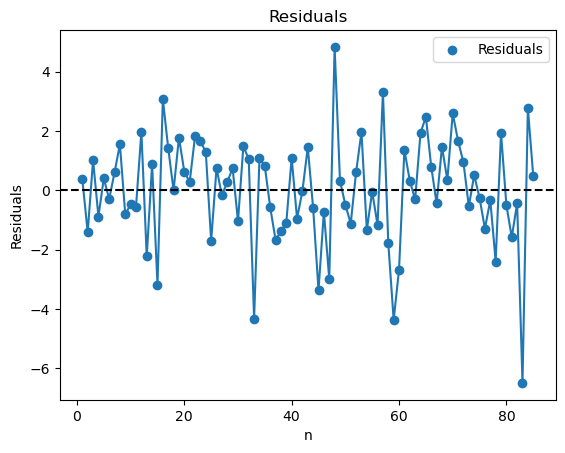

In [31]:
# Автокорреляция 

x_oxis = np.arange(1,86)
y_oxis = new_model.resid
plt.plot(x_oxis,y_oxis)
plt.axhline(y=0, color='black', linestyle='--')
plt.scatter(x_oxis, y_oxis, label="Residuals")   
plt.xlabel('n')
plt.ylabel("Residuals")
plt.title(f"Residuals")
plt.legend() 


In [32]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(new_model.resid)
if dw_statistic < 1.5:
    print("Обнаружена положительная автокорреляция.")
elif dw_statistic > 2.5:
    print("Обнаружена отрицательная автокорреляция.")
else:
    print("Автокорреляция не обнаружена.")

Автокорреляция не обнаружена.


### Вывод: Опираясь на результаты проведенного анализа, можно заключить, что построенная модель оценки продолжительности жизни граждан является статистически корректной и адекватно отражает влияние выбранных факторов. Отсутствие автокорреляции, мультиколлинеарности и гетероскедастичности подтверждает надежность и состоятельность полученных оценок.